In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [2]:
df=pd.read_csv('loan.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
495,LP002586,Female,Yes,1,Graduate,No,3326,913.0,105.0,84.0,1.0,Semiurban,Y
496,LP002587,Male,Yes,0,Not Graduate,No,2600,1700.0,107.0,360.0,1.0,Rural,Y
497,LP002588,Male,Yes,0,Graduate,No,4625,2857.0,111.0,12.0,NaN,Urban,Y
498,LP002600,Male,Yes,1,Graduate,Yes,2895,0.0,95.0,360.0,1.0,Semiurban,Y
499,LP002602,Male,No,0,Graduate,No,6283,4416.0,209.0,360.0,0.0,Rural,N


In [5]:
df.shape

(500, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
Loan_ID              500 non-null object
Gender               491 non-null object
Married              497 non-null object
Dependents           488 non-null object
Education            500 non-null object
Self_Employed        473 non-null object
ApplicantIncome      500 non-null int64
CoapplicantIncome    500 non-null float64
LoanAmount           482 non-null float64
Loan_Amount_Term     486 non-null float64
Credit_History       459 non-null float64
Property_Area        500 non-null object
Loan_Status          500 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 50.9+ KB


In [7]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
df.isnull().sum()

Loan_ID               0
Gender                9
Married               3
Dependents           12
Education             0
Self_Employed        27
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           18
Loan_Amount_Term     14
Credit_History       41
Property_Area         0
Loan_Status           0
dtype: int64

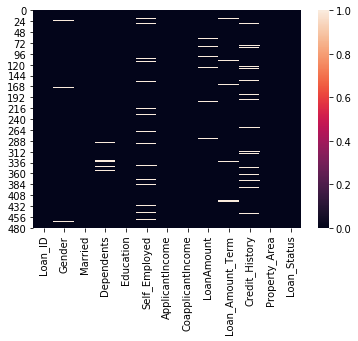

In [9]:
sns.heatmap(df.isnull())

In [10]:
df.duplicated().sum()

0

In [11]:
df.Gender.value_counts()

Male      400
Female     91
Name: Gender, dtype: int64

In [12]:
df.Gender.fillna('Male',inplace=True)

In [13]:
df.Married.value_counts()

Yes    322
No     175
Name: Married, dtype: int64

In [14]:
df.Married.fillna('Yes',inplace=True)

In [15]:
df.Dependents.value_counts()

0     288
1      81
2      79
3+     40
Name: Dependents, dtype: int64

In [16]:
df.Dependents.fillna(0,inplace=True)

In [17]:
df.Self_Employed.value_counts()

No     407
Yes     66
Name: Self_Employed, dtype: int64

In [18]:
df.Self_Employed.fillna('No',inplace=True)

In [19]:
df.LoanAmount.fillna(df.LoanAmount.mean(),inplace=True)

In [20]:
df.Loan_Amount_Term.value_counts()

360.0    415
180.0     35
480.0     12
300.0     12
240.0      3
120.0      3
84.0       2
60.0       2
12.0       1
36.0       1
Name: Loan_Amount_Term, dtype: int64

In [21]:
df.Loan_Amount_Term.fillna(df.Loan_Amount_Term.mean(),inplace=True)

In [22]:
df.Credit_History.value_counts()

1.0    387
0.0     72
Name: Credit_History, dtype: int64

In [23]:
df.Credit_History.fillna(1.0,inplace=True)

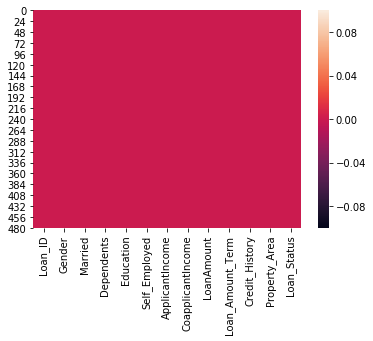

In [24]:
sns.heatmap(df.isnull())

In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,500.0,5493.644000,6515.668972,150.0,2874.5,3854.0,5764.00,81000.0
CoapplicantIncome,500.0,1506.307840,2134.432188,0.0,0.0,1125.5,2253.25,20000.0
LoanAmount,500.0,144.020747,80.846099,17.0,100.0,128.0,160.00,700.0
Loan_Amount_Term,500.0,342.543210,62.933126,12.0,360.0,360.0,360.00,480.0
Credit_History,500.0,0.856000,0.351441,0.0,1.0,1.0,1.00,1.0


In [26]:
# Exploratory Data Analysis

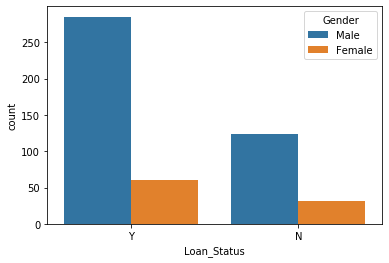

In [27]:
sns.countplot(x='Loan_Status',hue='Gender',data=df)

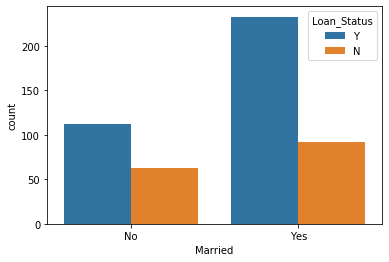

In [28]:
sns.countplot(x='Married',hue='Loan_Status',data=df)

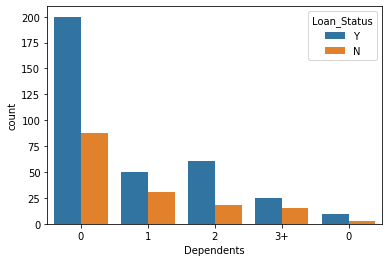

In [29]:
sns.countplot(x='Dependents',hue='Loan_Status',data=df)

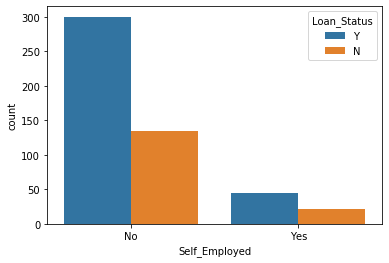

In [30]:
sns.countplot(x='Self_Employed',hue='Loan_Status',data=df)

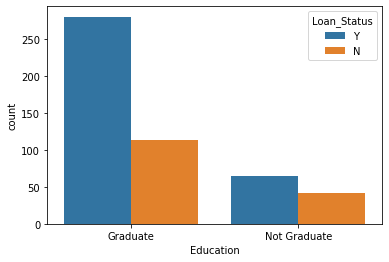

In [31]:
sns.countplot(x='Education',hue='Loan_Status',data=df)

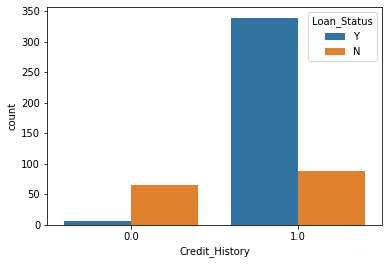

In [32]:
sns.countplot(x='Credit_History',hue='Loan_Status',data=df)

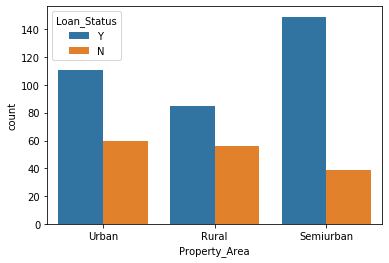

In [33]:
sns.countplot(x='Property_Area',hue='Loan_Status',data=df)

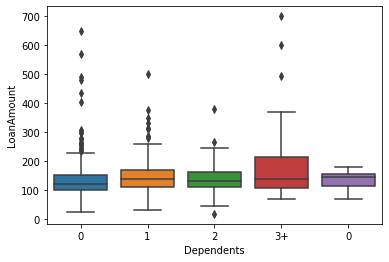

In [34]:
sns.boxplot(df.Dependents,df.LoanAmount)

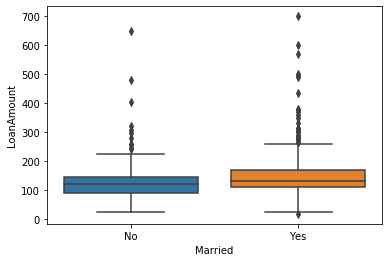

In [35]:
sns.boxplot(df.Married,df.LoanAmount)

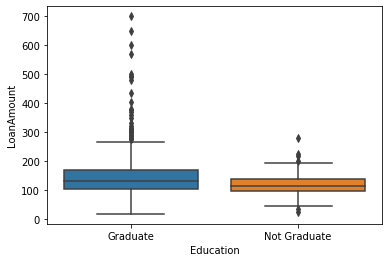

In [36]:
sns.boxplot(df.Education,df.LoanAmount)

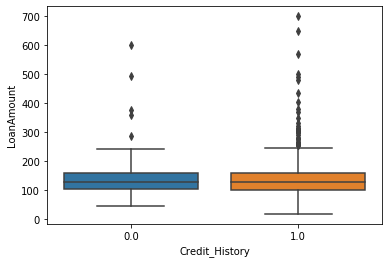

In [37]:
sns.boxplot(df.Credit_History,df.LoanAmount)

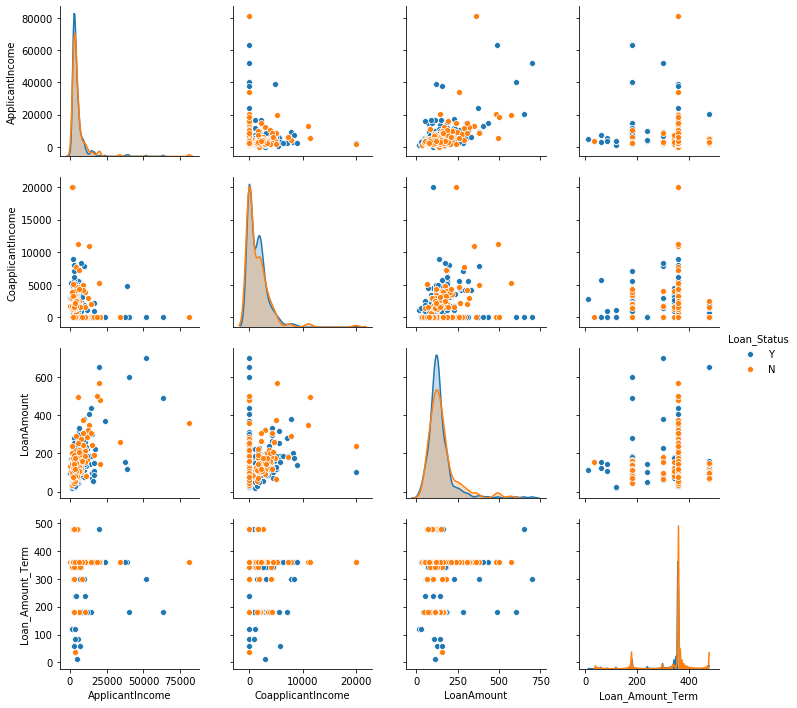

In [38]:
sns.pairplot(vars=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],hue='Loan_Status',data=df)

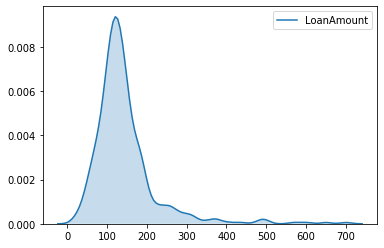

In [39]:
sns.kdeplot(df.LoanAmount,shade=True)

In [40]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.121292,0.577733,-0.068974,-0.036329
CoapplicantIncome,-0.121292,1.000000,0.204491,0.006509,-0.023587
LoanAmount,0.577733,0.204491,1.000000,0.030285,-0.025784
Loan_Amount_Term,-0.068974,0.006509,0.030285,1.000000,0.015209
Credit_History,-0.036329,-0.023587,-0.025784,0.015209,1.000000


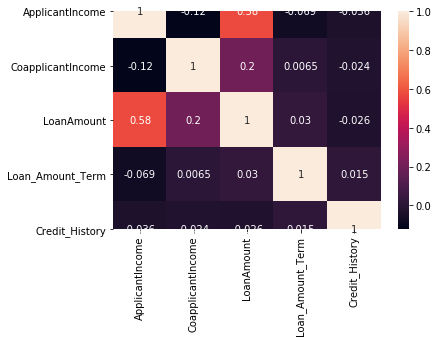

In [41]:
sns.heatmap(df.corr(),annot=True)

In [42]:
# Model Buiding

In [43]:
df=df.drop('Loan_ID',axis=True)

In [44]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,144.020747,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
495,Female,Yes,1,Graduate,No,3326,913.0,105.000000,84.0,1.0,Semiurban,Y
496,Male,Yes,0,Not Graduate,No,2600,1700.0,107.000000,360.0,1.0,Rural,Y
497,Male,Yes,0,Graduate,No,4625,2857.0,111.000000,12.0,1.0,Urban,Y
498,Male,Yes,1,Graduate,Yes,2895,0.0,95.000000,360.0,1.0,Semiurban,Y


In [45]:
le=LabelEncoder()
cate_columns=['Gender','Married','Education','Self_Employed', 'Property_Area']
for x in cate_columns:
    df[x]=le.fit_transform(df[x])

In [46]:
df['Loan_Status'].replace({'Y':1,'N':0},inplace=True)


In [47]:
df['Dependents']=df['Dependents'].replace('3+',3)
df['Dependents']=df['Dependents'].astype(int)

In [48]:
df.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
96,0,1,0,0,0,2484,2302.0,137.0,360.0,1.0,1,1
436,1,0,0,0,0,1926,1851.0,50.0,360.0,1.0,1,1
430,0,0,1,0,1,8624,0.0,150.0,360.0,1.0,1,1
426,0,0,1,1,0,4606,0.0,81.0,360.0,1.0,0,0
179,1,0,0,1,0,2333,1451.0,102.0,480.0,0.0,2,0


In [49]:
y=df.Loan_Status
x=df.drop('Loan_Status',axis=1)
y.shape,x.shape

((500,), (500, 11))

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=15)

In [51]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [52]:
sgd_clf=SGDClassifier(shuffle=True)

In [53]:
sgd_clf.fit(x_train,y_train)
prediction=sgd_clf.predict(x_test)

In [54]:
print('intercept: ',sgd_clf.intercept_)
print('Coefficients: ',sgd_clf.coef_)

intercept:  [3.37381832]
Coefficients:  [[-0.84082369 -1.36701571 -1.61119348 -0.45784437  2.4708001   2.32172422
  -0.55851065  0.91137211 -2.16029763  2.55360213  0.10601488]]


In [55]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.36      0.33      0.35        27
           1       0.76      0.78      0.77        73

    accuracy                           0.66       100
   macro avg       0.56      0.56      0.56       100
weighted avg       0.65      0.66      0.66       100



In [56]:
print('Accuracy Score: ',accuracy_score(y_test,prediction))

Accuracy Score:  0.66


In [57]:
cm=confusion_matrix(y_test,prediction)
cm

array([[ 9, 18],
       [16, 57]], dtype=int64)

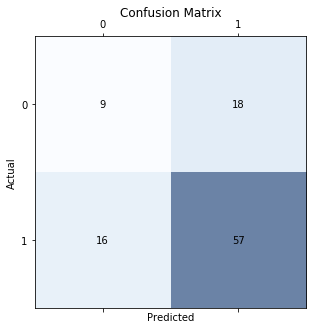

In [58]:
fig,ax=plt.subplots(figsize=(5,5))
ax.matshow(cm,cmap=plt.cm.Blues,alpha=0.60)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j,y=i,s=cm[i,j],va='center',ha='center')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [59]:
print('Area Under Curve: ',roc_auc_score(y_test,prediction))


Area Under Curve:  0.5570776255707763
